# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
genes = torch.load(
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 15728 × 23149
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3'

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


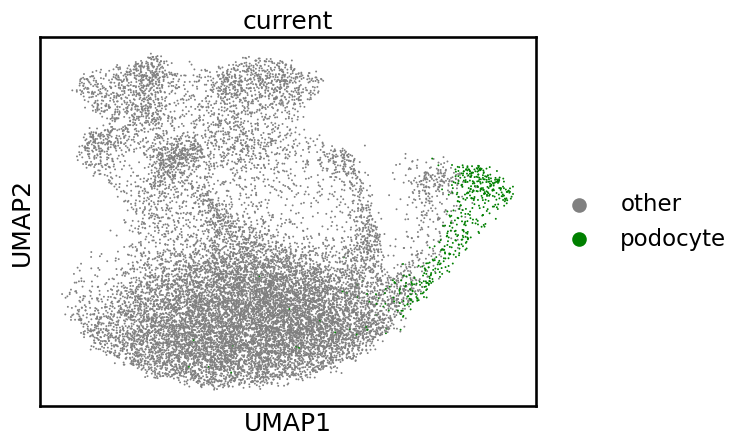

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


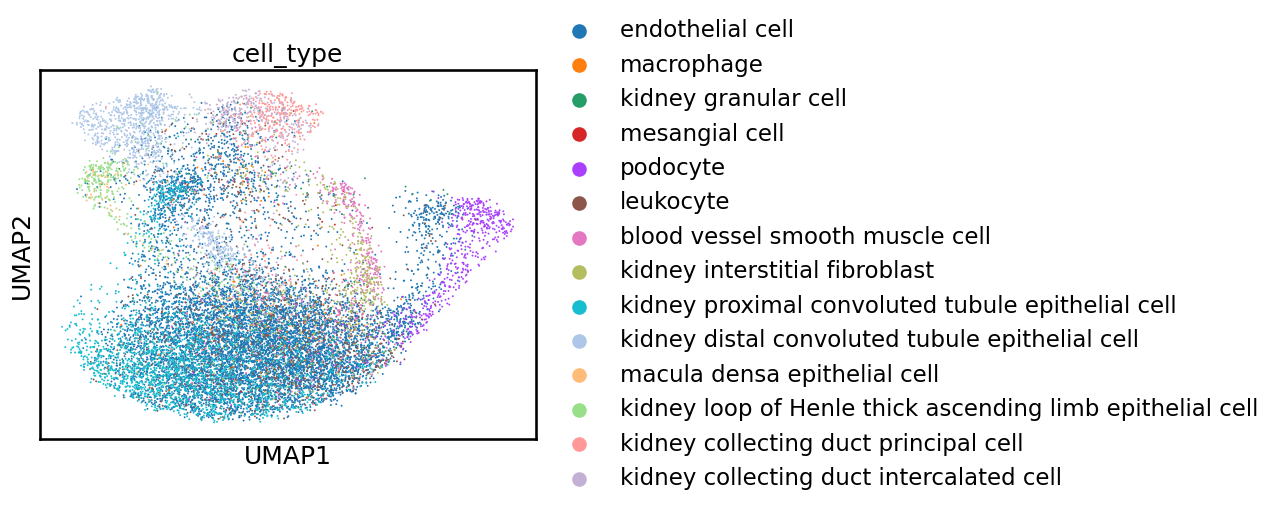

In [7]:
sc.pl.umap(adata, color=['cell_type'])

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 74.96 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


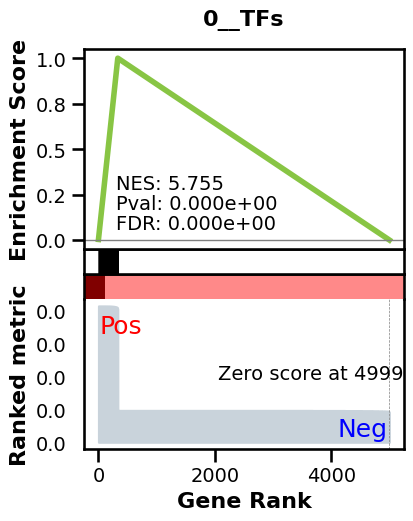

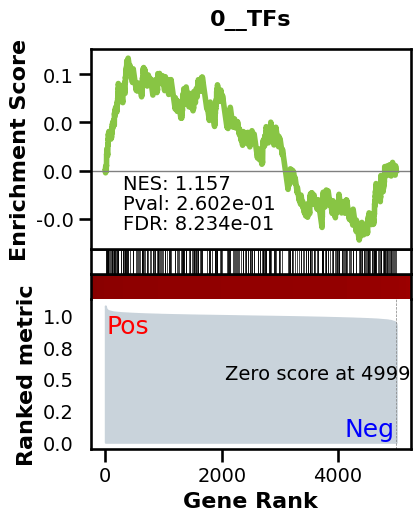

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3565 genes
intersection pct: 0.713
precision:  0.004541789382676131 
recall:  0.33513633669235326 
random precision: 0.001062203773751226



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 46.25it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.20it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.14it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.23it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.28it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.30it/s]


 27%|██▋       | 35/128 [00:00<00:02, 46.25it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.24it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.29it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.31it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.30it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.32it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.25it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.23it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.26it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.23it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.17it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.06it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.14it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.19it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.21it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.19it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 46.24it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 46.28it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.20it/s]

Average Precision (AP):  0.0028506585986099184
Area Under Precision-Recall Curve (AUPRC):  0.00252355640477646
EPR: 5.849284104972232


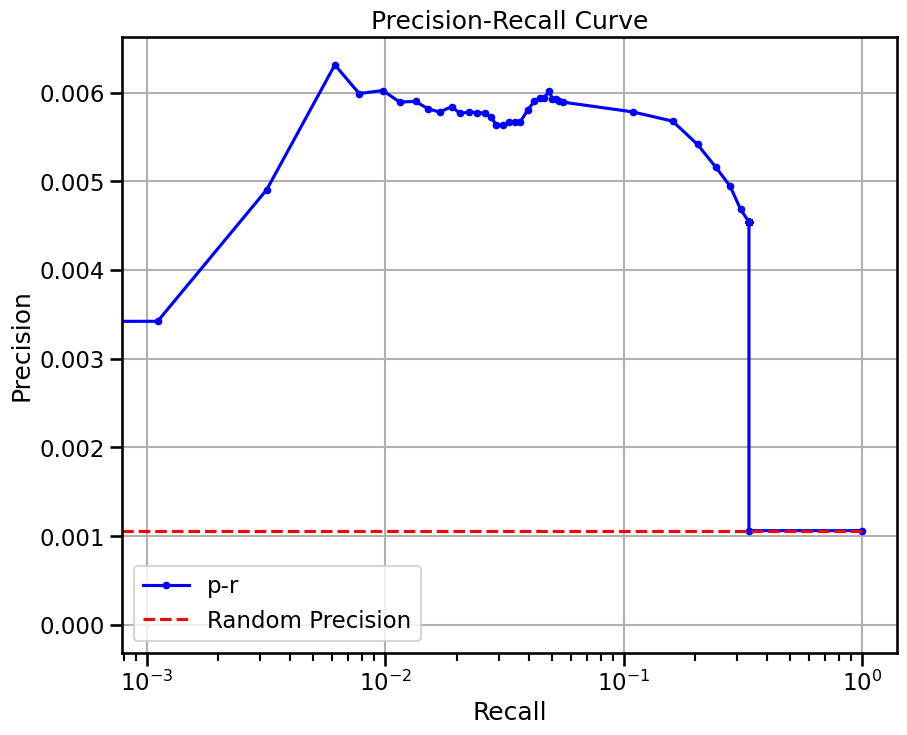

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 262.67 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


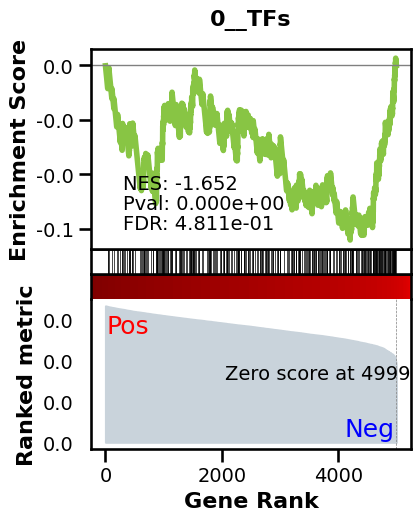

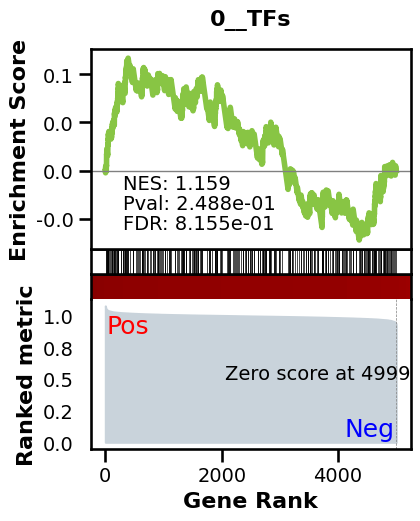

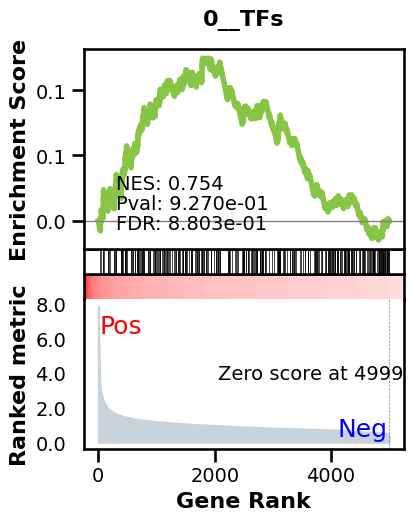

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3565 genes
intersection pct: 0.713
precision:  0.0011096698483979172 
recall:  0.6956135151155898 
random precision: 0.001062203773751226



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.40it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.34it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.27it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.31it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.33it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.31it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.35it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.37it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.38it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.39it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.37it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.37it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.32it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.34it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.35it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.36it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.39it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.38it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.34it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.34it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.35it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.37it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.35it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.34it/s]

Average Precision (AP):  0.001095405878733279
Area Under Precision-Recall Curve (AUPRC):  0.0010760455741965266


EPR: 1.7466859320820376


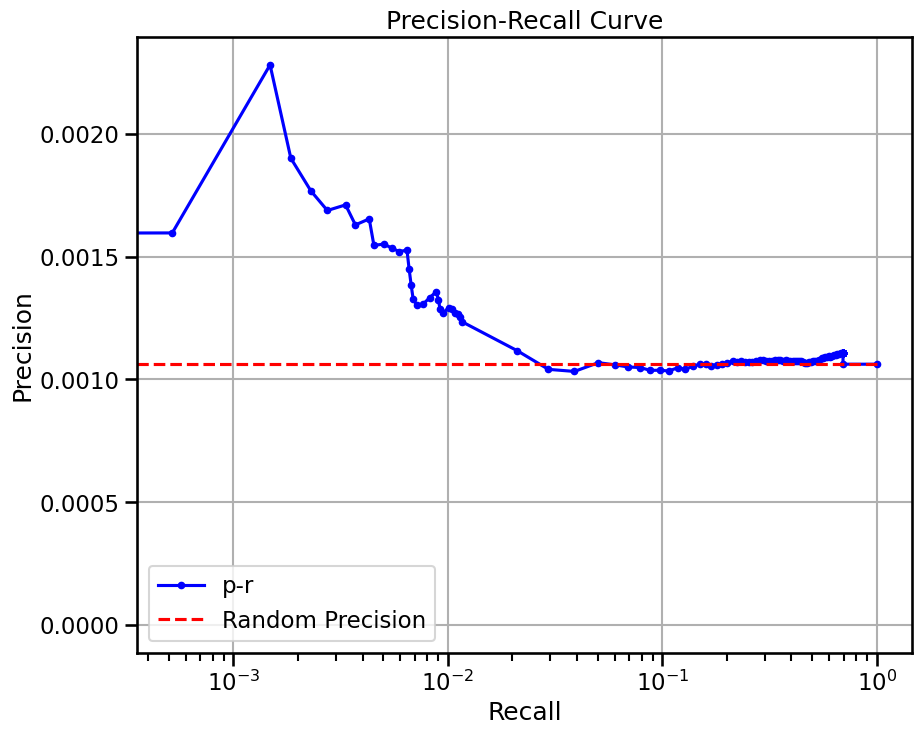

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 40.44 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


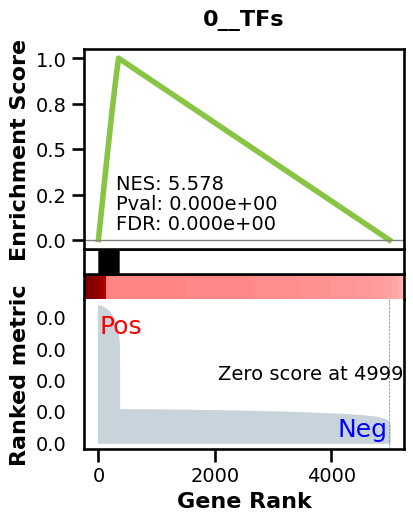

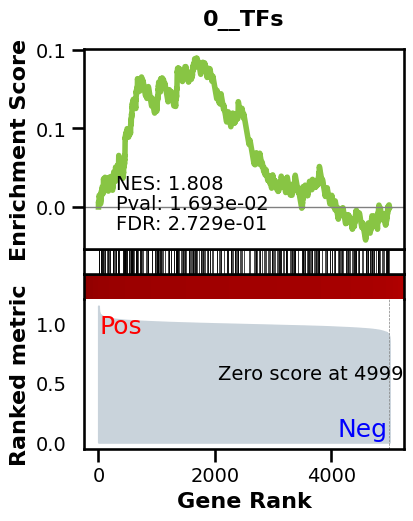

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3514 genes
intersection pct: 0.7028
precision:  0.006271091258494464 
recall:  0.40673661698857183 
random precision: 0.0012121008868434197



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.73it/s]


  8%|▊         | 10/128 [00:00<00:02, 47.67it/s]


 12%|█▏        | 15/128 [00:00<00:02, 47.71it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.72it/s]


 20%|█▉        | 25/128 [00:00<00:02, 47.69it/s]


 23%|██▎       | 30/128 [00:00<00:02, 47.68it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.65it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.68it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.65it/s]


 39%|███▉      | 50/128 [00:01<00:01, 47.66it/s]


 43%|████▎     | 55/128 [00:01<00:01, 47.71it/s]


 47%|████▋     | 60/128 [00:01<00:01, 47.75it/s]


 51%|█████     | 65/128 [00:01<00:01, 47.69it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 47.66it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 47.69it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 47.70it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 47.69it/s]


 70%|███████   | 90/128 [00:01<00:00, 47.71it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 47.73it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 47.73it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.68it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.67it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.67it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.69it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.68it/s]

Average Precision (AP):  0.0038068710056600934
Area Under Precision-Recall Curve (AUPRC):  0.0033103141109521303
EPR: 4.897761556952193


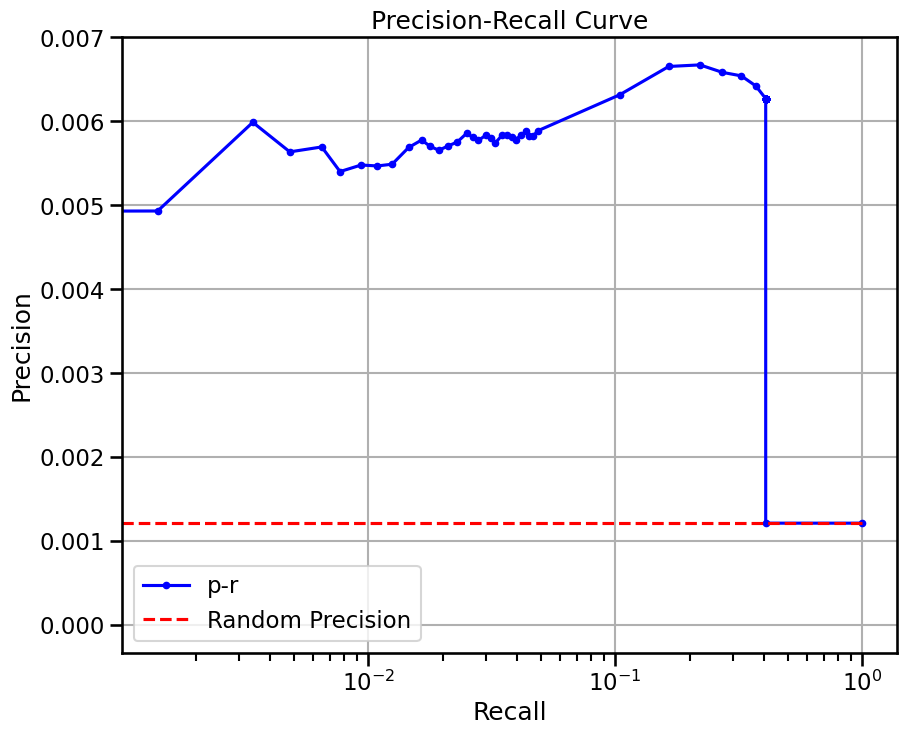

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 64.58 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


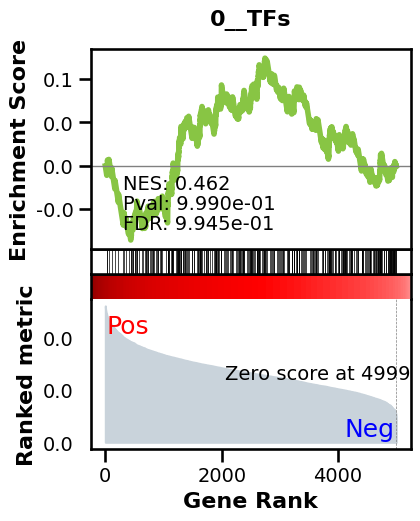

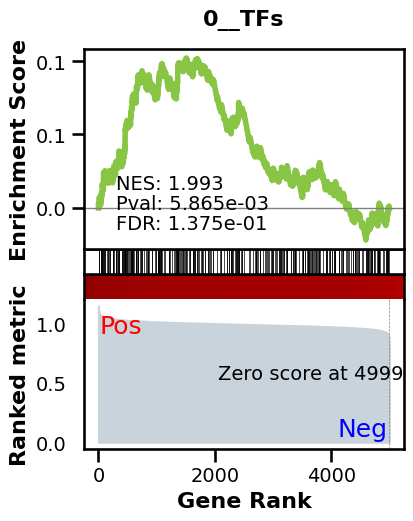

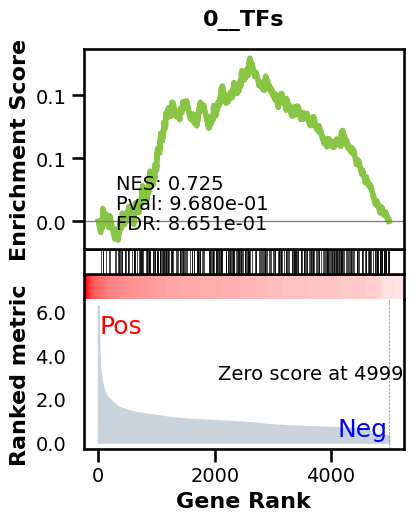

_________________________________________
TF specific enrichment


found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3514 genes
intersection pct: 0.7028
precision:  0.001285625479006546 
recall:  0.32881106729933834 
random precision: 0.0012121008868434197



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.47it/s]


  8%|▊         | 10/128 [00:00<00:02, 47.49it/s]


 12%|█▏        | 15/128 [00:00<00:02, 47.16it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.21it/s]


 20%|█▉        | 25/128 [00:00<00:02, 47.32it/s]


 23%|██▎       | 30/128 [00:00<00:02, 47.32it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.37it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.37it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.37it/s]


 39%|███▉      | 50/128 [00:01<00:01, 47.35it/s]


 43%|████▎     | 55/128 [00:01<00:01, 47.35it/s]


 47%|████▋     | 60/128 [00:01<00:01, 47.35it/s]


 51%|█████     | 65/128 [00:01<00:01, 47.38it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 47.43it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 47.42it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 47.36it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 47.34it/s]


 70%|███████   | 90/128 [00:01<00:00, 47.39it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 47.41it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 47.38it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.41it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.39it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.45it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.44it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.36it/s]

Average Precision (AP):  0.0012326445926554342
Area Under Precision-Recall Curve (AUPRC):  0.0012041101257049699
EPR: 0.7162872764286753


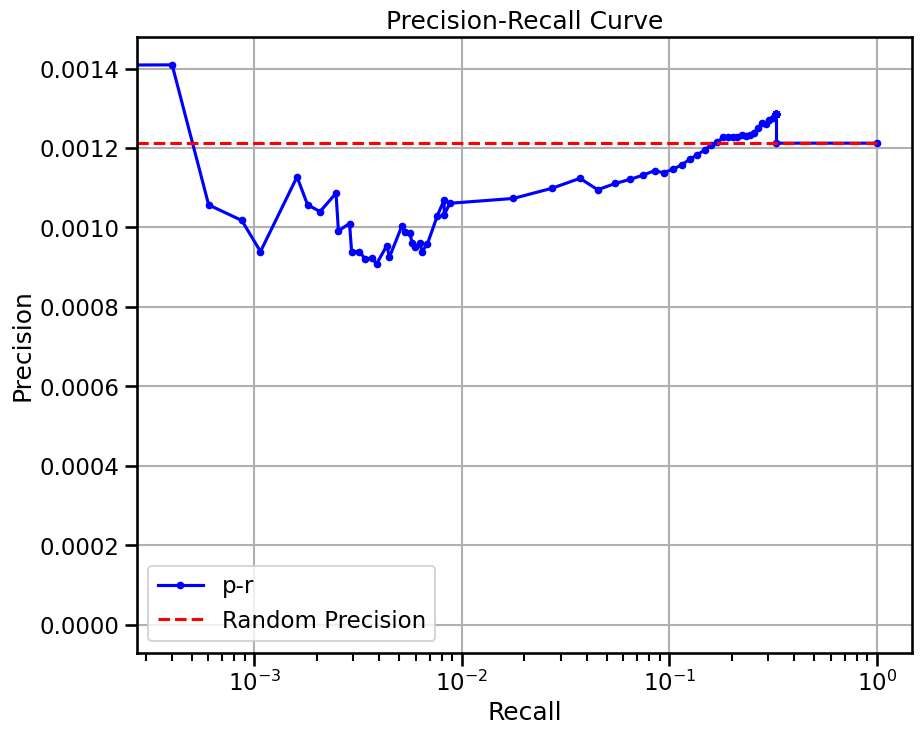

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 46.47 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


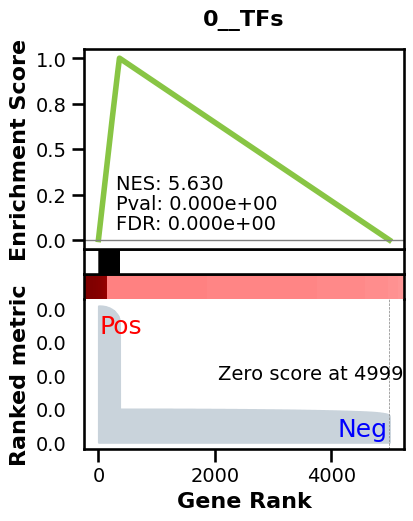

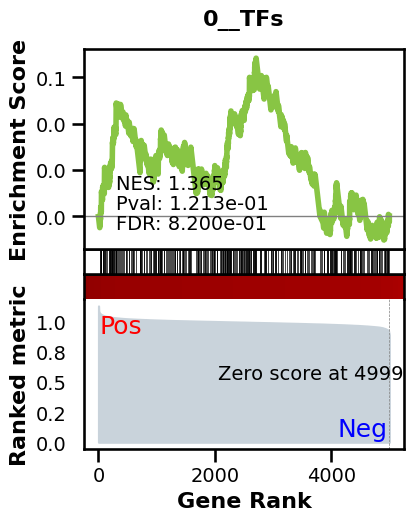

_________________________________________
TF specific enrichment


found some significant results for  1.4285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3594 genes
intersection pct: 0.7188
precision:  0.007092883035904675 
recall:  0.4387900153522488 
random precision: 0.0013619352909207464



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.58it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.62it/s]


 12%|█▏        | 15/128 [00:00<00:02, 44.66it/s]


 16%|█▌        | 20/128 [00:00<00:02, 44.64it/s]


 20%|█▉        | 25/128 [00:00<00:02, 44.61it/s]


 23%|██▎       | 30/128 [00:00<00:02, 44.60it/s]


 27%|██▋       | 35/128 [00:00<00:02, 44.63it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.65it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.62it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.60it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.64it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.58it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.51it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.54it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.57it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.58it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.62it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.63it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.65it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.67it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.63it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.62it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.62it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.29it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.55it/s]

Average Precision (AP):  0.005337285240454103
Area Under Precision-Recall Curve (AUPRC):  0.004757467010786939
EPR: 8.781634597124883


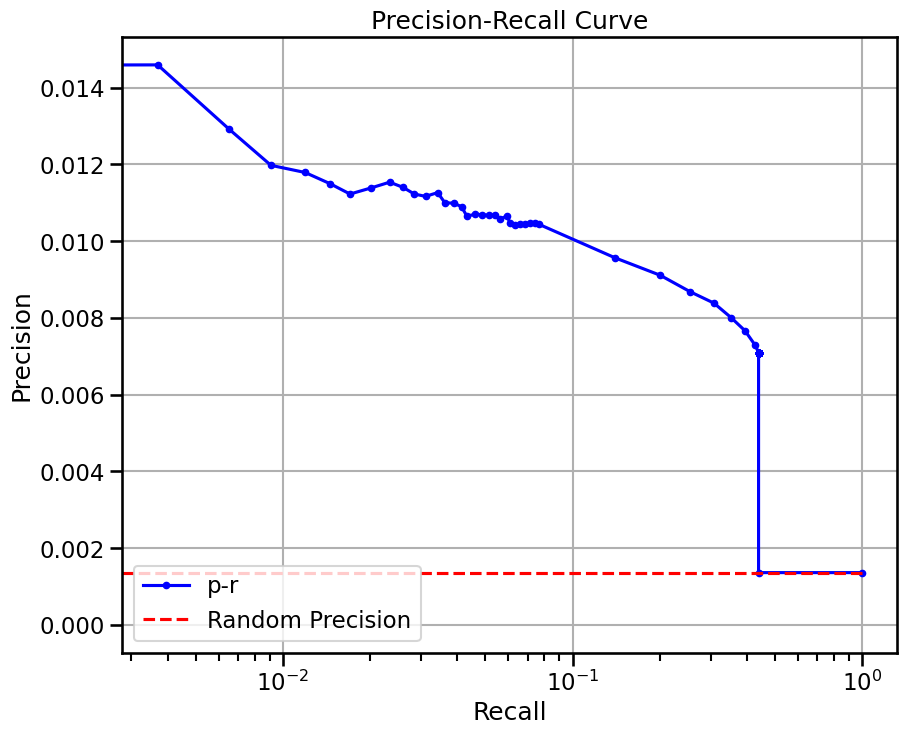

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 94.85 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


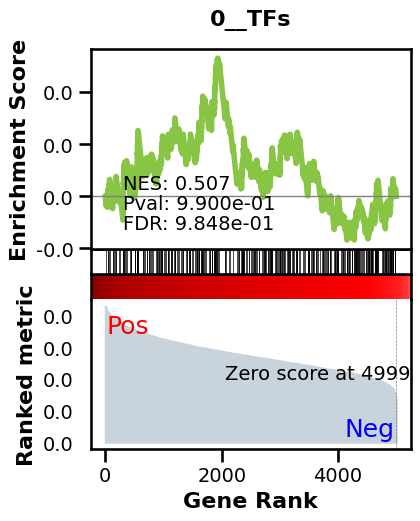

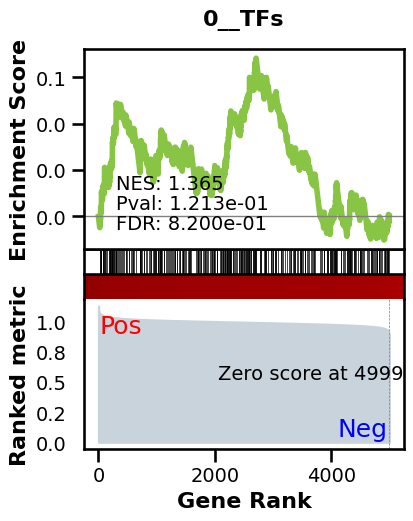

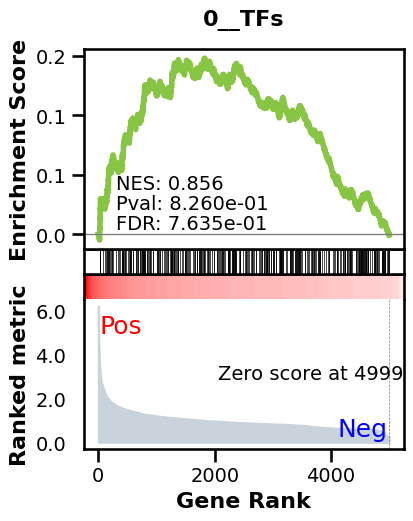

_________________________________________
TF specific enrichment


found some significant results for  2.857142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3594 genes
intersection pct: 0.7188
precision:  0.001539952451821791 
recall:  0.4742707681810428 
random precision: 0.0013619352909207464



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.68it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.90it/s]


 12%|█▏        | 15/128 [00:00<00:02, 44.96it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.01it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.03it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.03it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.02it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.93it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.87it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.85it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.87it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.92it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.96it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.69it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.78it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.87it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.92it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.95it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.98it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.00it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.00it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.91it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.94it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.97it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.92it/s]

Average Precision (AP):  0.0014811949583253049
Area Under Precision-Recall Curve (AUPRC):  0.0014320894483849911
EPR: 1.5890254176610075


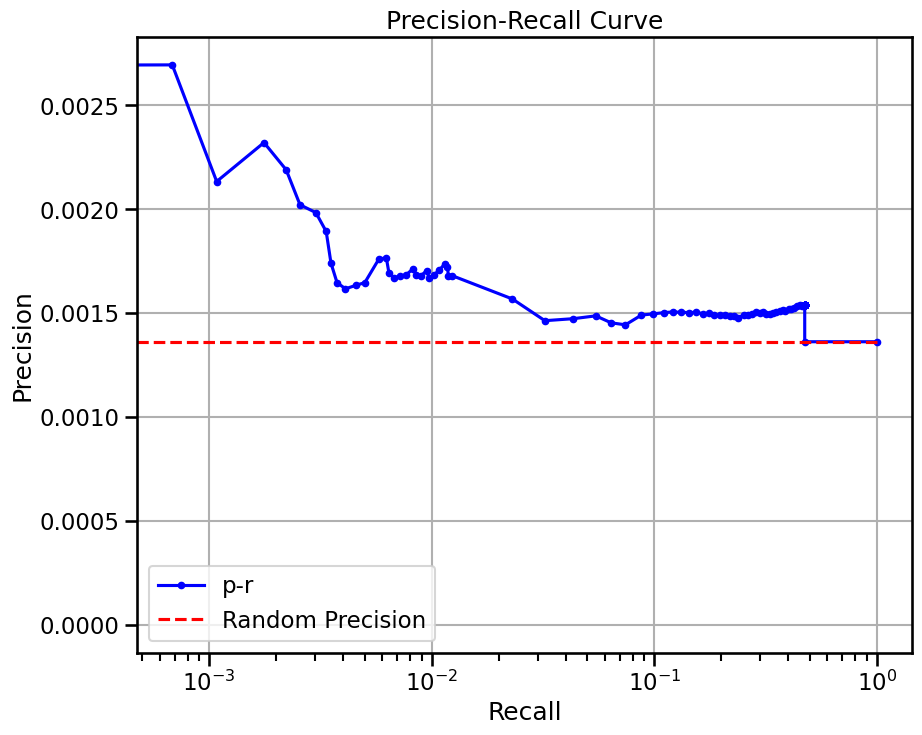

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 22.75 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


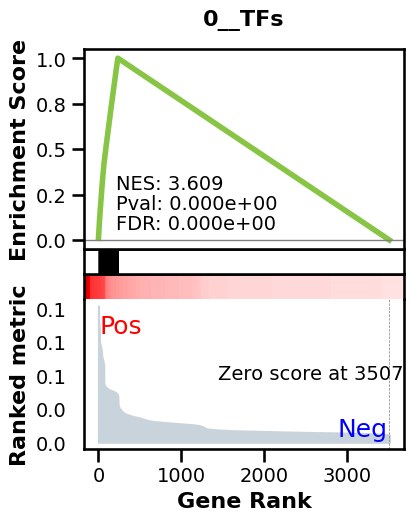

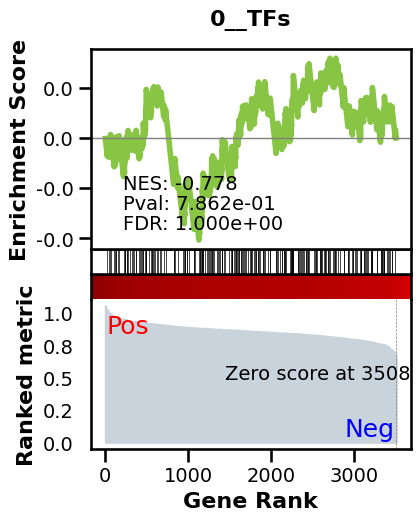

_________________________________________
TF specific enrichment


found some significant results for  2.5641025641025643 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2542 genes
intersection pct: 0.7242165242165243
precision:  0.011580584843104287 
recall:  0.1789703739679456 
random precision: 0.0012750761624232764



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.64it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.71it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.85it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.85it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.79it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.83it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.89it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.93it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.93it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 90.93it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 90.94it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 90.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.85it/s]

Average Precision (AP):  0.003349531418887418
Area Under Precision-Recall Curve (AUPRC):  0.0030541973899464257
EPR: 9.434251628175465


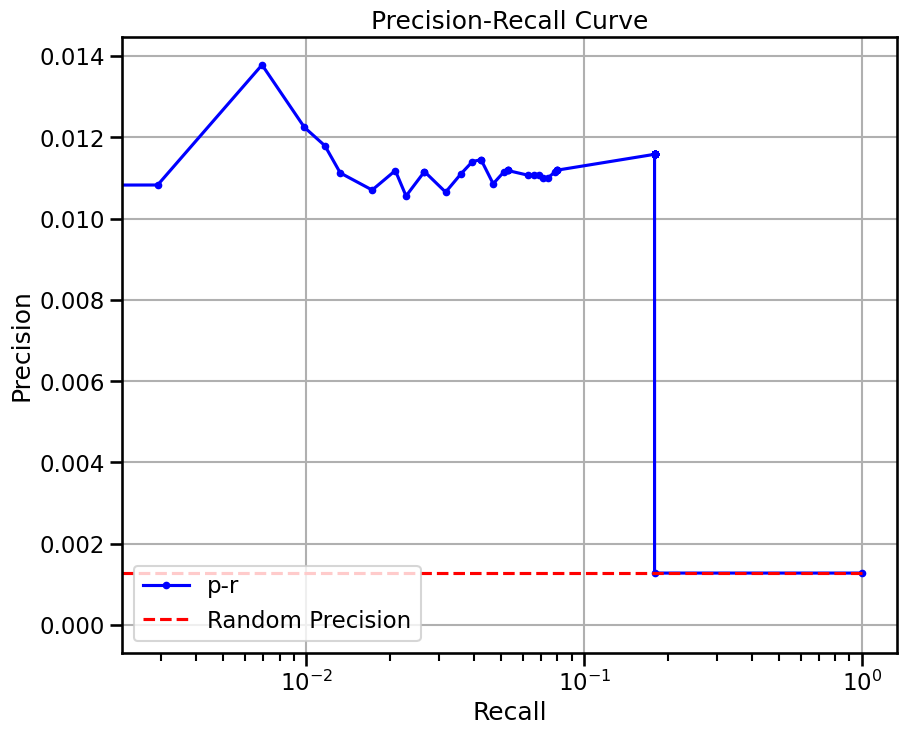

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 23.17 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


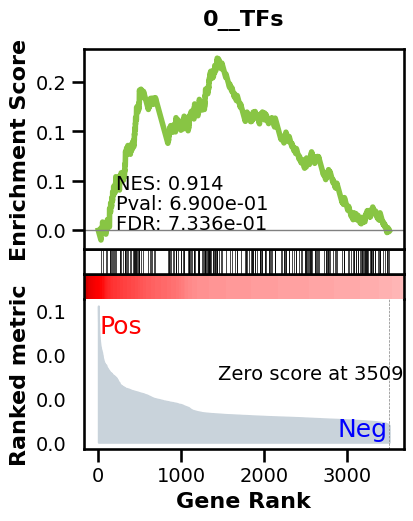

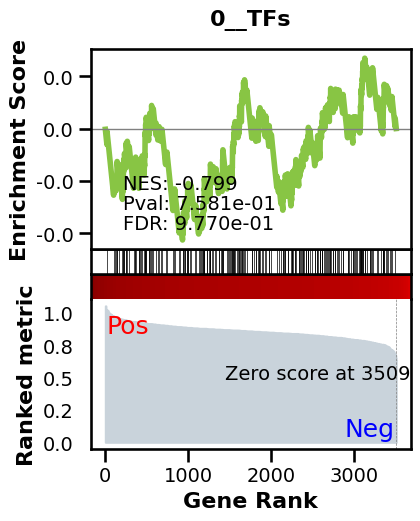

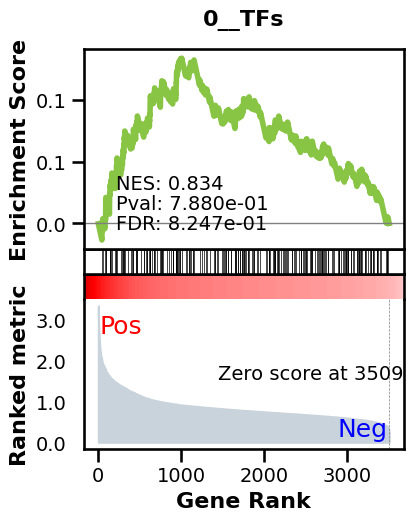

_________________________________________
TF specific enrichment


found some significant results for  2.5641025641025643 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2542 genes
intersection pct: 0.7242165242165243
precision:  0.0016484163428705993 
recall:  0.0305973773676542 
random precision: 0.0012750761624232764



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.83it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.81it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.82it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.20it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.48it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.65it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.80it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.81it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.78it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 90.79it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 90.85it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 90.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.72it/s]

Average Precision (AP):  0.001177156569385212
Area Under Precision-Recall Curve (AUPRC):  0.0012825989724762198
EPR: 1.3342748933585344


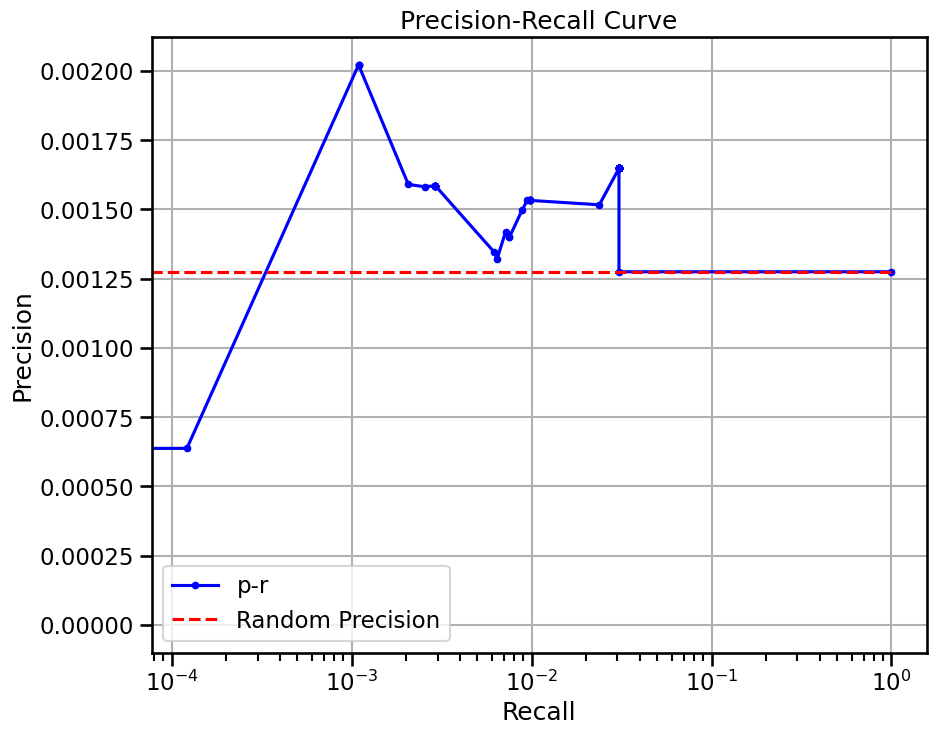

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 36.26 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


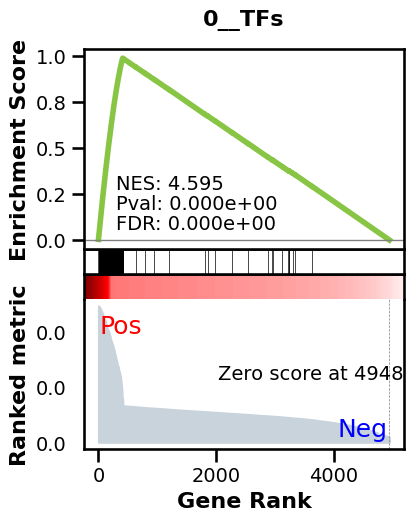

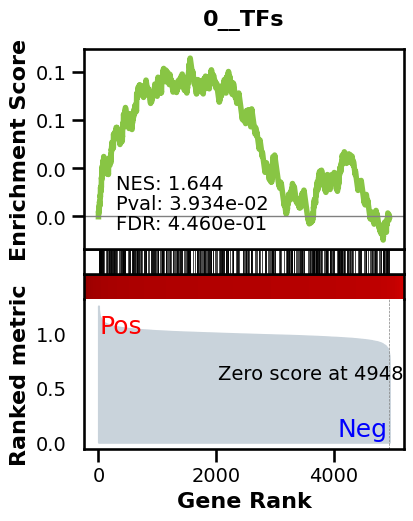

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3595 genes
intersection pct: 0.7264093756314407
precision:  0.00896463904832305 
recall:  0.37216471129514606 
random precision: 0.0016822195546123465



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.26it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.27it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.46it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.76it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.95it/s]


 23%|██▎       | 30/128 [00:00<00:02, 44.06it/s]


 27%|██▋       | 35/128 [00:00<00:02, 44.13it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.16it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.19it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.20it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.24it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.25it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.23it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.23it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.26it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.30it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.29it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.28it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.29it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.29it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.32it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.30it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.29it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.24it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.18it/s]

Average Precision (AP):  0.0054905113019332215
Area Under Precision-Recall Curve (AUPRC):  0.004916303339642281
EPR: 5.978256210614143


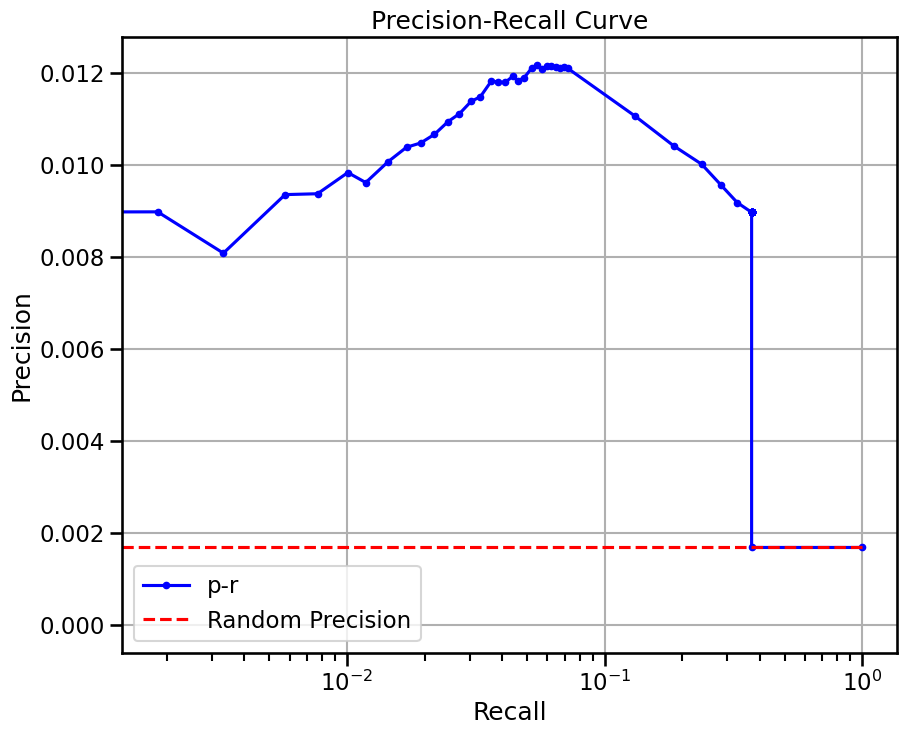

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 47.64 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


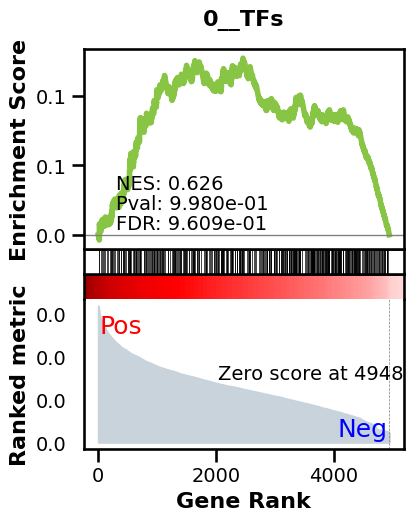

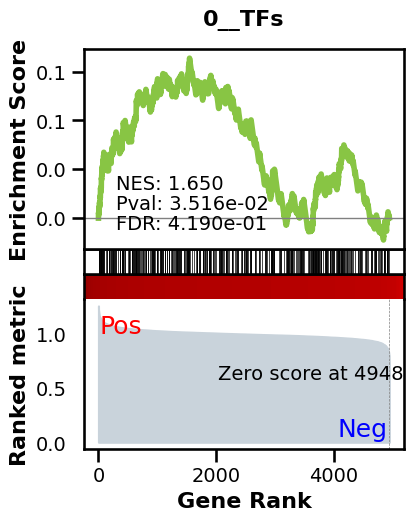

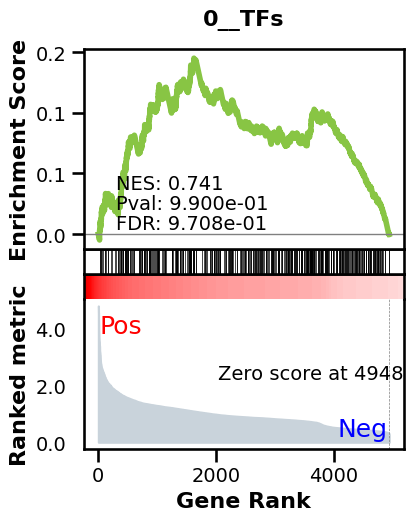

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3595 genes
intersection pct: 0.7264093756314407
precision:  0.002206980823429709 
recall:  0.2576029445594663 
random precision: 0.0016822195546123465



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.24it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.20it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.17it/s]


 16%|█▌        | 20/128 [00:00<00:02, 44.98it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.09it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.07it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.15it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.16it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.03it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.93it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.87it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.83it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.78it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.77it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.75it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.73it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.72it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.72it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.72it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.68it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.61it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.61it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.57it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.58it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.46it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.75it/s]

Average Precision (AP):  0.0018285890904070012
Area Under Precision-Recall Curve (AUPRC):  0.0017771005963575573
EPR: 1.1218100192058453


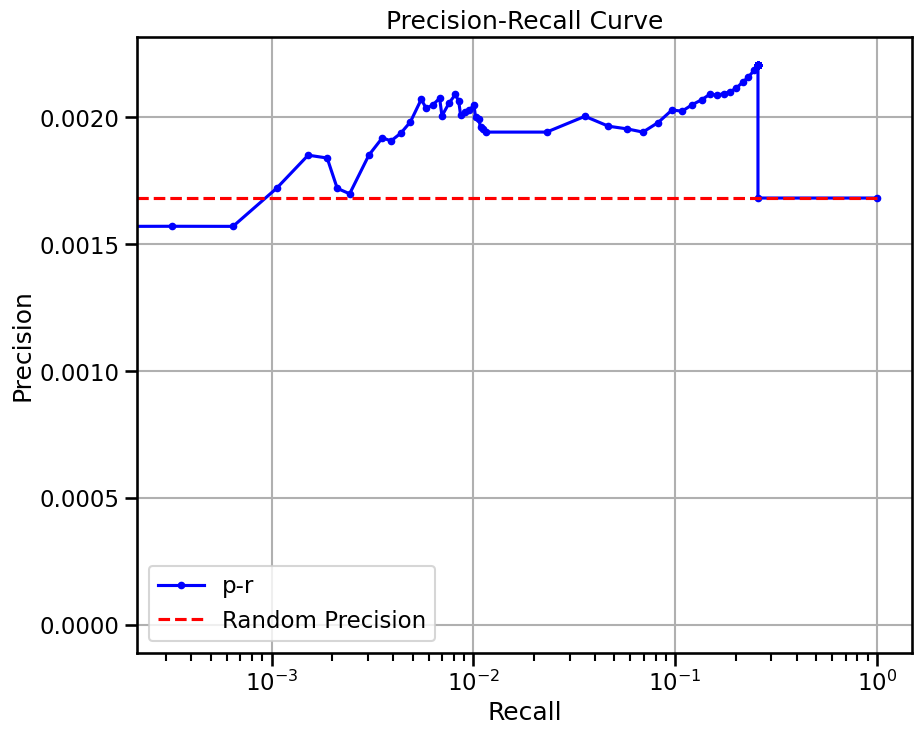

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 41.59 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


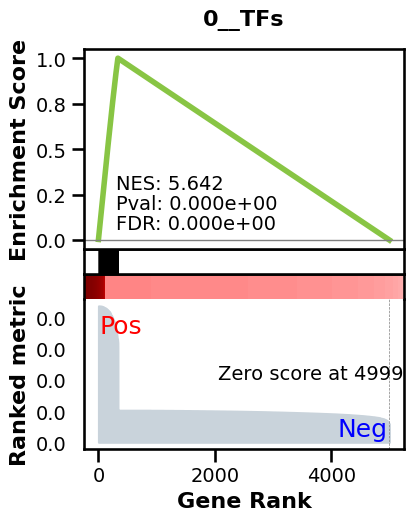

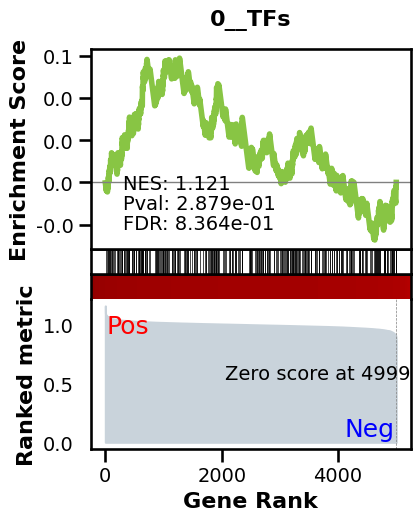

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3603 genes
intersection pct: 0.7206
precision:  0.008509893153340102 
recall:  0.4291732223519261 
random precision: 0.001518183918238287



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.30it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.38it/s]


 12%|█▏        | 15/128 [00:00<00:02, 44.42it/s]


 16%|█▌        | 20/128 [00:00<00:02, 44.51it/s]


 20%|█▉        | 25/128 [00:00<00:02, 44.49it/s]


 23%|██▎       | 30/128 [00:00<00:02, 44.45it/s]


 27%|██▋       | 35/128 [00:00<00:02, 44.42it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.41it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.38it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.40it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.37it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.40it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.46it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.40it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.44it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.43it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.49it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.50it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.53it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.53it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.56it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.53it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.45it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.46it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.44it/s]

Average Precision (AP):  0.0052484975615239675
Area Under Precision-Recall Curve (AUPRC):  0.0046805414565712425
EPR: 6.145020274594569


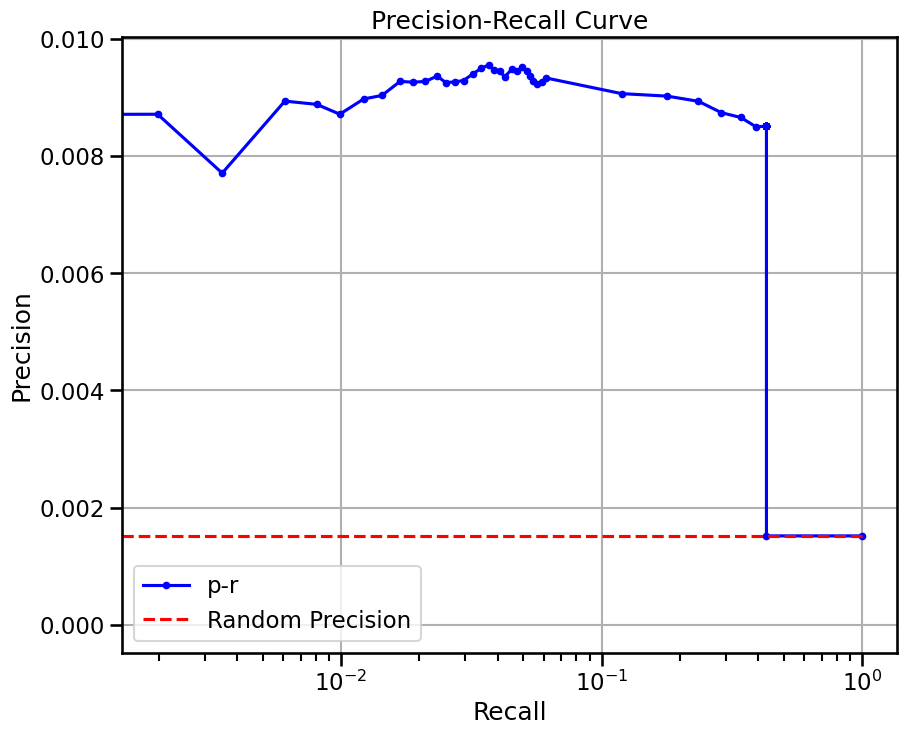

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 85.88 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


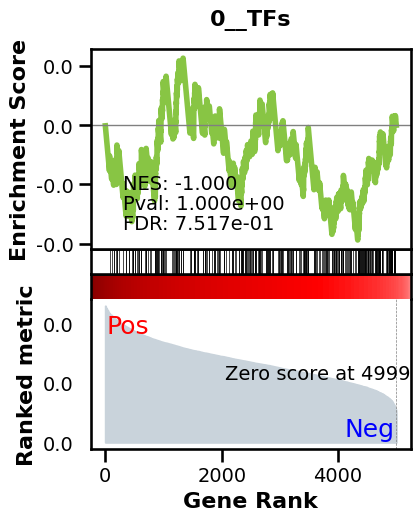

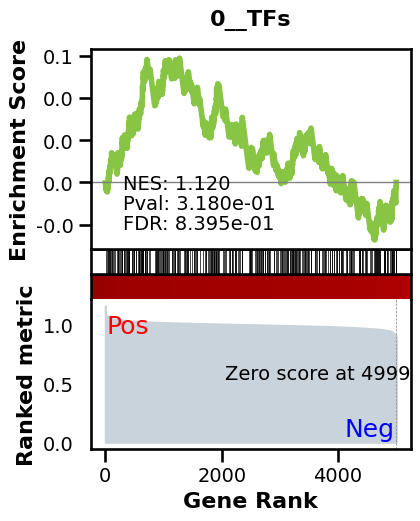

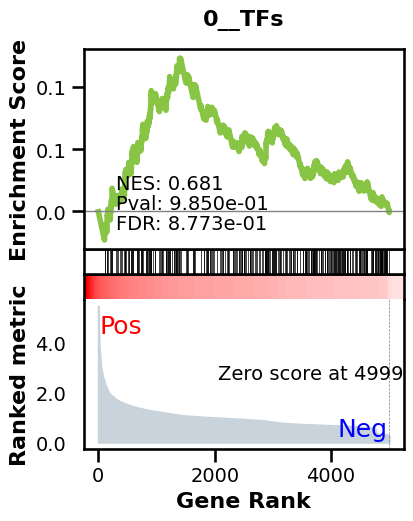

_________________________________________
TF specific enrichment


found some significant results for  4.25531914893617 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3603 genes
intersection pct: 0.7206
precision:  0.001674633348973699 
recall:  0.4119169669593463 
random precision: 0.001518183918238287



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.73it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.74it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.77it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.75it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.78it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.78it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.79it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.77it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.76it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.70it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.50it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.56it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.60it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.66it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.70it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.72it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.76it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.76it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.78it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.73it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.76it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.79it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.76it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.79it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.81it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.72it/s]

Average Precision (AP):  0.0015823538224594797
Area Under Precision-Recall Curve (AUPRC):  0.001539994484667556


EPR: 0.7348799242950723


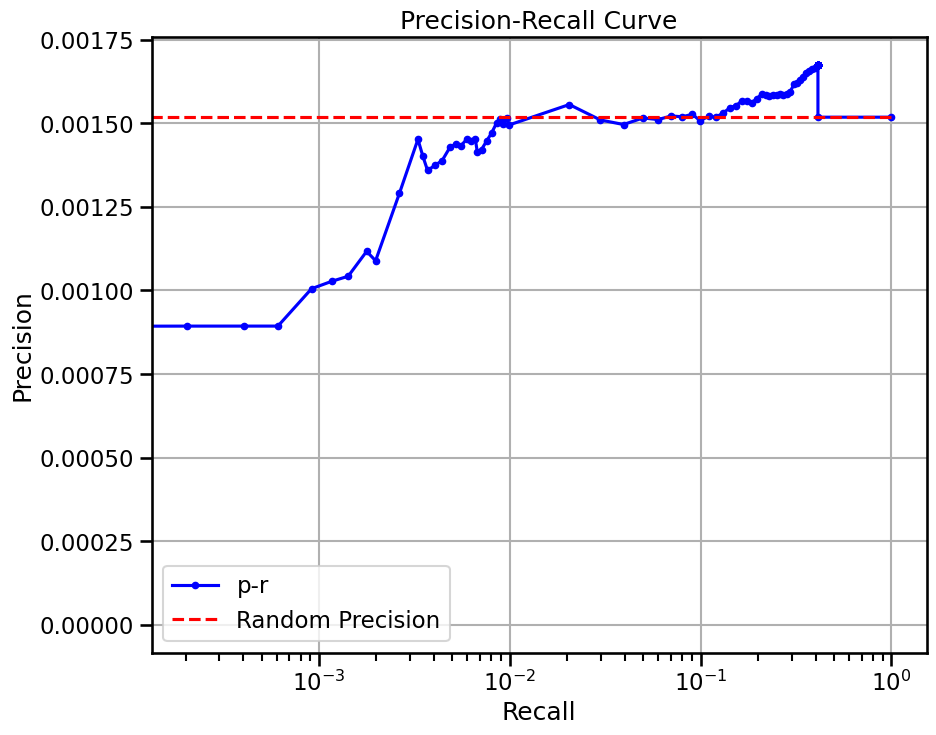

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 31.20 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


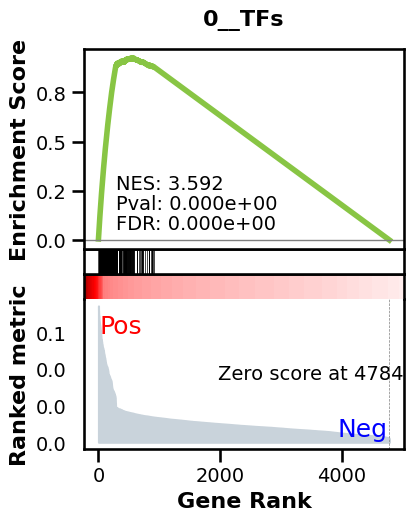

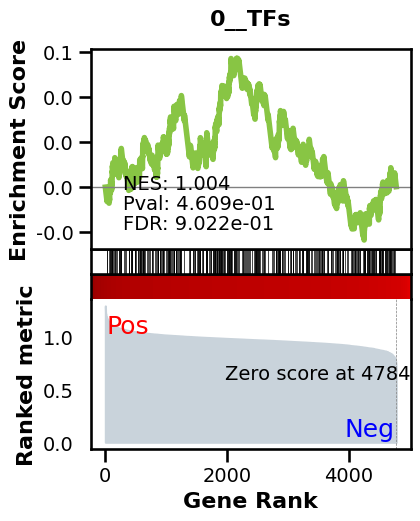

_________________________________________
TF specific enrichment


found some significant results for  2.4390243902439024 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3411 genes
intersection pct: 0.7128526645768025
precision:  0.009331147617220653 
recall:  0.25440598453150753 
random precision: 0.0013561437852866911



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.35it/s]


  8%|▊         | 10/128 [00:00<00:02, 49.49it/s]


 12%|█▏        | 15/128 [00:00<00:02, 49.45it/s]


 16%|█▌        | 20/128 [00:00<00:02, 49.48it/s]


 20%|█▉        | 25/128 [00:00<00:02, 49.57it/s]


 23%|██▎       | 30/128 [00:00<00:01, 49.50it/s]


 27%|██▋       | 35/128 [00:00<00:01, 49.51it/s]


 31%|███▏      | 40/128 [00:00<00:01, 49.51it/s]


 35%|███▌      | 45/128 [00:00<00:01, 49.50it/s]


 39%|███▉      | 50/128 [00:01<00:01, 49.55it/s]


 43%|████▎     | 55/128 [00:01<00:01, 49.53it/s]


 47%|████▋     | 60/128 [00:01<00:01, 49.60it/s]


 51%|█████     | 65/128 [00:01<00:01, 49.58it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 49.40it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 49.39it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 49.40it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 49.53it/s]


 70%|███████   | 90/128 [00:01<00:00, 49.55it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 49.53it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 49.57it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 49.59it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 49.58it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 49.60it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 49.61it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 49.59it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 49.52it/s]

Average Precision (AP):  0.003925004962797144
Area Under Precision-Recall Curve (AUPRC):  0.0033775019219795498
EPR: 6.5477109026987135


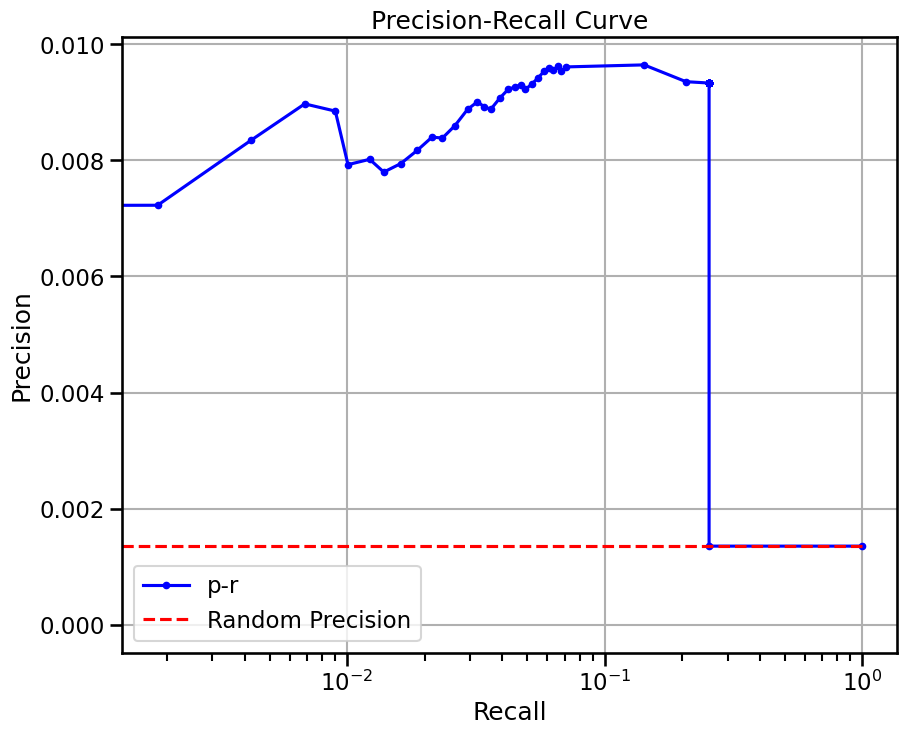

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 31.60 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


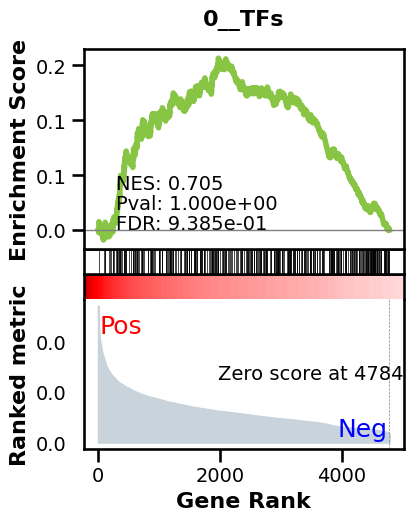

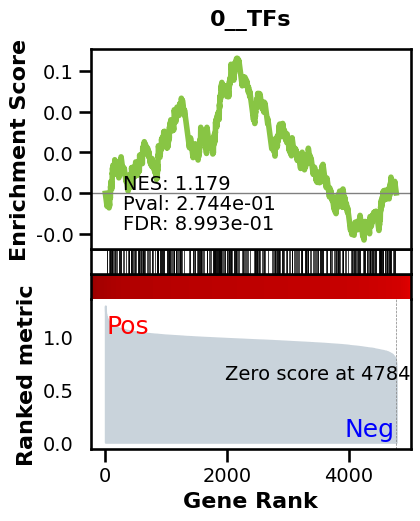

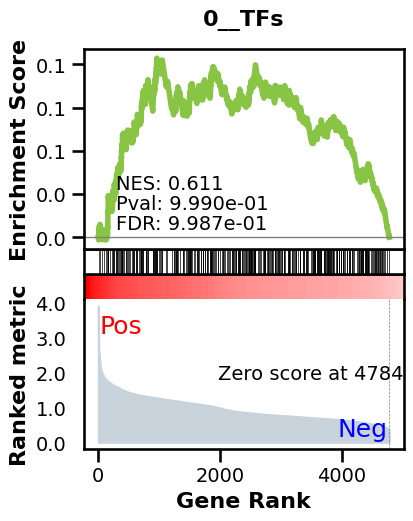

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3411 genes
intersection pct: 0.7128526645768025
precision:  0.001856214279002524 
recall:  0.07138328895651071 
random precision: 0.0013561437852866911



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.28it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.48it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.55it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.59it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.66it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.70it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.11it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.29it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.42it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.50it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.57it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.52it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.58it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.60it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.61it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.60it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.60it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.61it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.58it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.65it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.67it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.54it/s]

Average Precision (AP):  0.001384961126647782
Area Under Precision-Recall Curve (AUPRC):  0.0013751209299609028
EPR: 1.2630649585124507


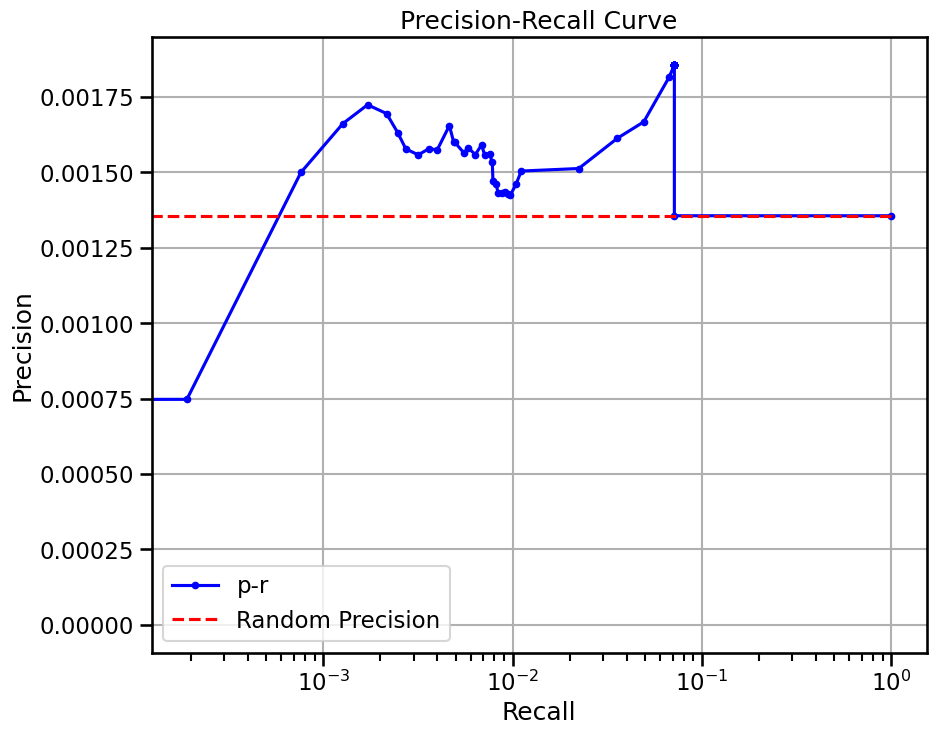

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 15.86 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


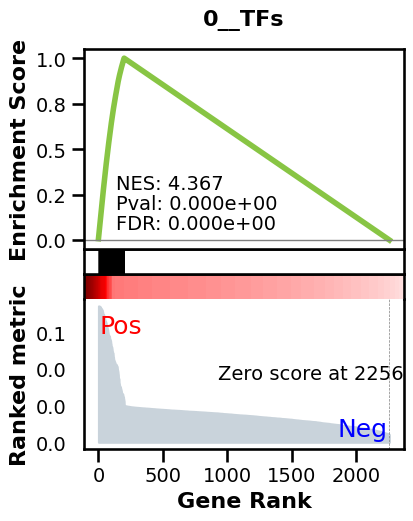

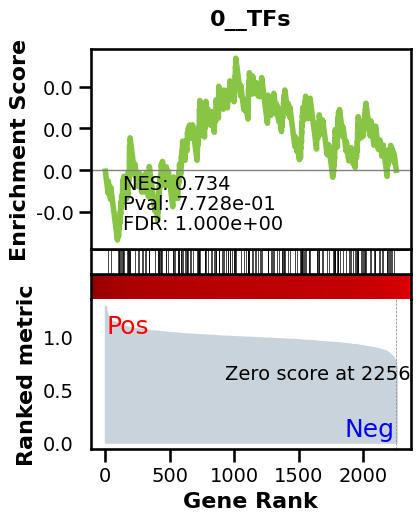

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1545 genes
intersection pct: 0.6845369960124058
precision:  0.009188551561432917 
recall:  0.37841984147276914 
random precision: 0.001639502322383755



  0%|          | 0/128 [00:00<?, ?it/s]


 20%|█▉        | 25/128 [00:00<00:00, 249.39it/s]


 39%|███▉      | 50/128 [00:00<00:00, 248.45it/s]


 59%|█████▉    | 76/128 [00:00<00:00, 249.57it/s]


 79%|███████▉  | 101/128 [00:00<00:00, 249.54it/s]


 99%|█████████▉| 127/128 [00:00<00:00, 249.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 248.94it/s]

Average Precision (AP):  0.006097495201627464
Area Under Precision-Recall Curve (AUPRC):  0.005781176553272736
EPR: 9.454522889486277


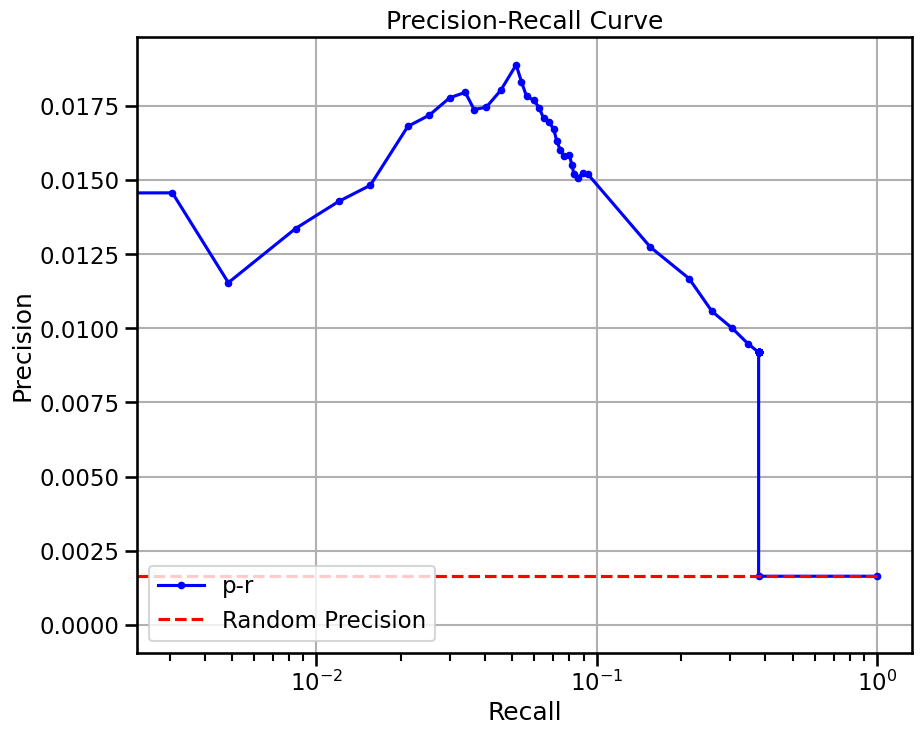

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 16.70 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


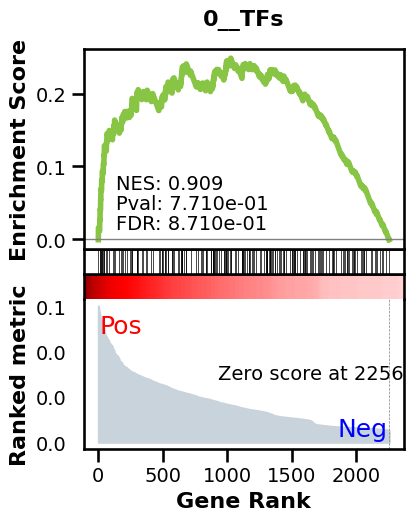

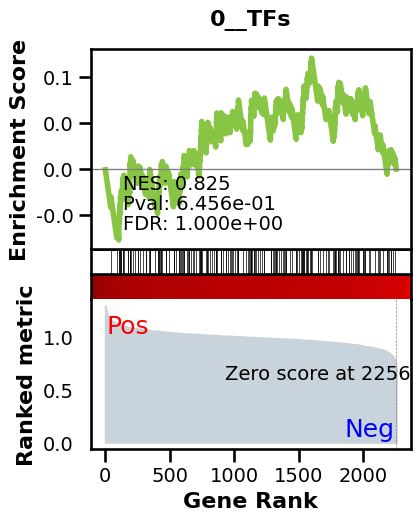

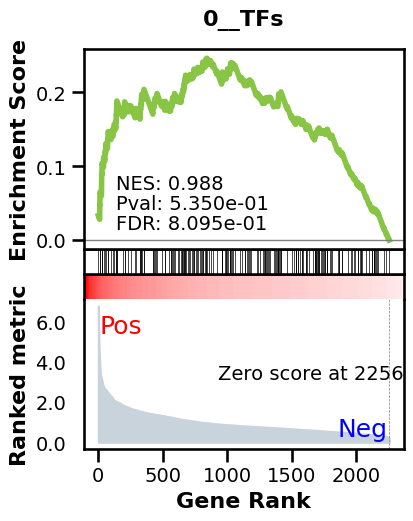

_________________________________________
TF specific enrichment


found some significant results for  10.526315789473685 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1545 genes
intersection pct: 0.6845369960124058
precision:  0.0022959552969107387 
recall:  0.2027614420864229 
random precision: 0.001639502322383755



  0%|          | 0/128 [00:00<?, ?it/s]


 21%|██        | 27/128 [00:00<00:00, 260.42it/s]


 42%|████▏     | 54/128 [00:00<00:00, 259.79it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 259.31it/s]


 84%|████████▎ | 107/128 [00:00<00:00, 260.12it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 259.84it/s]

Average Precision (AP):  0.0016960689439870014
Area Under Precision-Recall Curve (AUPRC):  0.0017903071540811078
EPR: 1.248658655459195


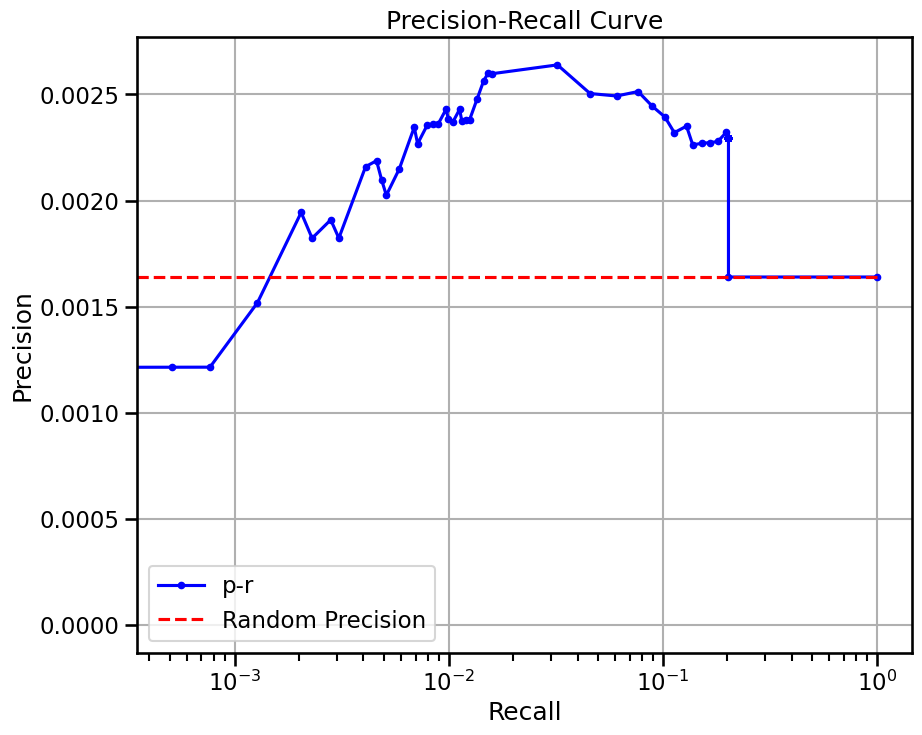

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 31.63 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


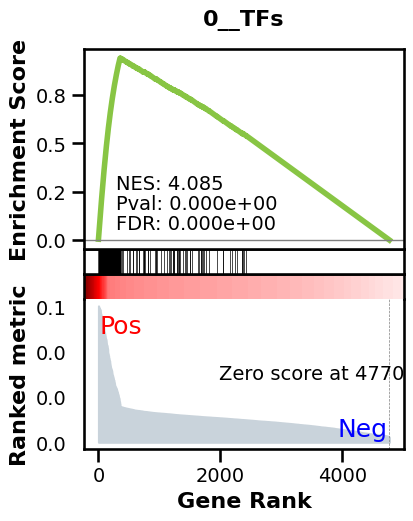

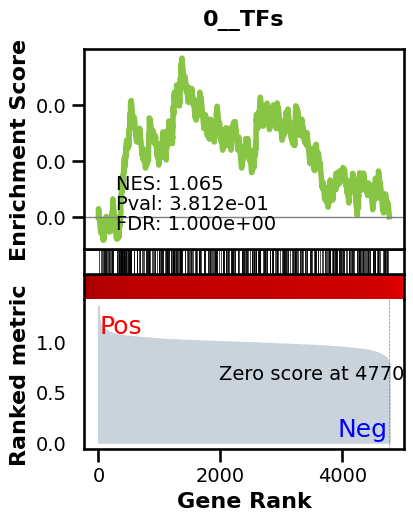

_________________________________________
TF specific enrichment


found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3406 genes
intersection pct: 0.7138964577656676
precision:  0.009544498926019955 
recall:  0.32796150187454537 
random precision: 0.0015409448472635749



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.33it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.46it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.46it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.46it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.45it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.44it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.48it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.44it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.47it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.40it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.38it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.35it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.33it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.26it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.26it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.32it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.32it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.18it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.11it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.05it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 49.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.25it/s]

Average Precision (AP):  0.005047515883367648
Area Under Precision-Recall Curve (AUPRC):  0.004712568423019291
EPR: 5.934936091576408


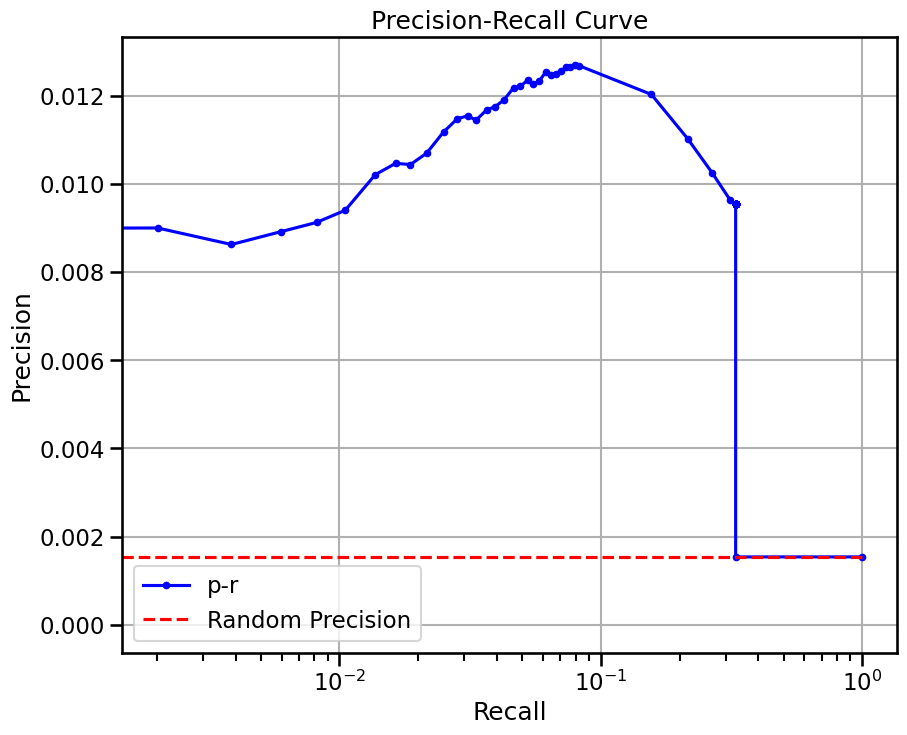

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 36.69 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


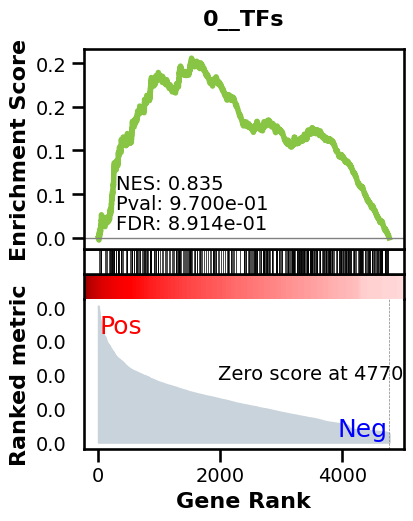

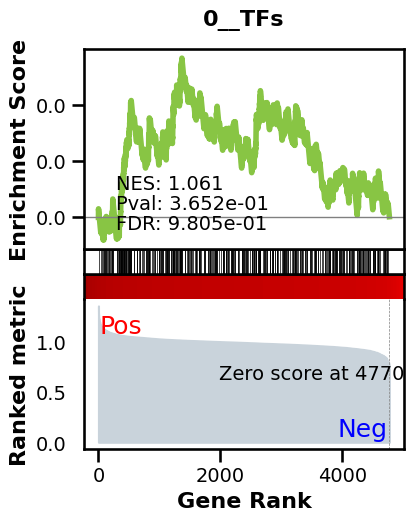

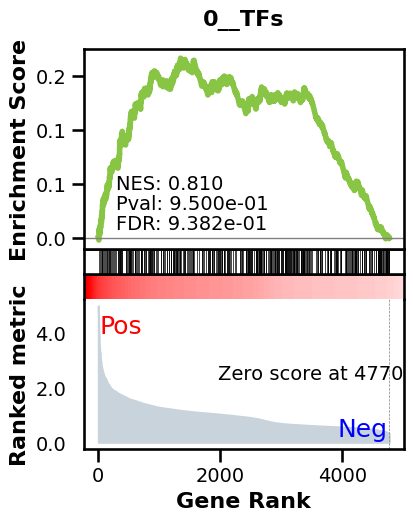

_________________________________________
TF specific enrichment


found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3406 genes
intersection pct: 0.7138964577656676
precision:  0.002308445385969307 
recall:  0.19646354428963125 
random precision: 0.0015409448472635749



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.12it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.25it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.26it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.28it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.33it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.38it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.36it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.33it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.28it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.35it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.36it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.35it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.25it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.26it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.26it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.31it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.30it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.22it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.31it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.38it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.30it/s]

Average Precision (AP):  0.0015709317218276543
Area Under Precision-Recall Curve (AUPRC):  0.0016294208207601668
EPR: 1.2720250886940248


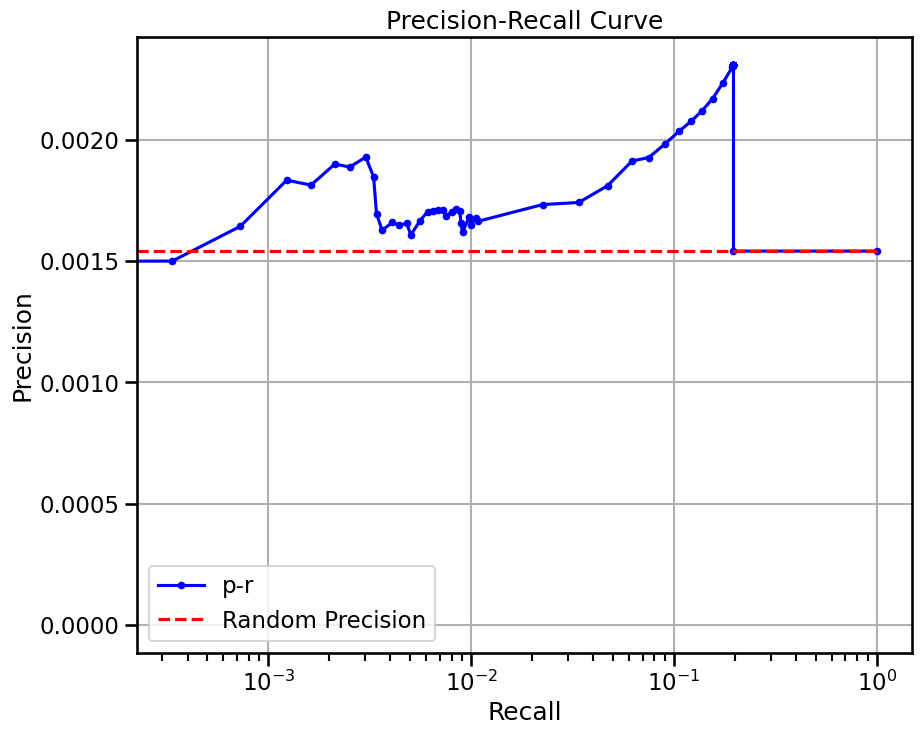

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)]
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    print(celltype, genie_grn.shape)
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(genie_grn.shape[1])

In [9]:
shapes

[5000, 5000, 5000, 3510, 4949, 5000, 4785, 2257, 4771]

In [10]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Melanocytes'],
  'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Melanocytes'],
  'significant_enriched_TFtargets': 14.705882352941176,
  'precision': 0.004541789382676131,
  'recall': 0.33513633669235326,
  'rand_precision': 0.001062203773751226,
  'auprc': 0.00252355640477646,
  'ap': 0.0028506585986099184,
  'epr': 5.849284104972232},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Ductal cells',


In [11]:
False
True
True
True
True
True
True
False
True
True
True
True
False
False
False
False
True
True


True

In [12]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name       EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell  5.849284  0.002524   
1     kidney distal convoluted tubule epithelial cell  1.746686  0.001076   
2   kidney loop of Henle thick ascending limb epit...  4.897762  0.003310   
3   kidney loop of Henle thick ascending limb epit...  0.716287  0.001204   
4               kidney collecting duct principal cell  8.781635  0.004757   
5               kidney collecting duct principal cell  1.589025  0.001432   
6                                      mesangial cell  9.434252  0.003054   
7                                      mesangial cell  1.334275  0.001283   
8                     blood vessel smooth muscle cell  5.978256  0.004916   
9                     blood vessel smooth muscle cell  1.121810  0.001777   
10                                           podocyte  6.145020  0.004681   
11                                           podocyte  0.734880  0.001540   
12                                         macrophage  6.547711  0.003378   
13                                         macrophage  1.263065  0.001375   
14                                          leukocyte  9.454523  0.005781   
15                                          leukocyte  1.248659  0.001790   
16                     kidney interstitial fibroblast  5.934936  0.004713   
17                     kidney interstitial fibroblast  1.272025  0.001629   

        RAND    TF_targ  TF_enr  TF_only  
0   0.001062  14.705882    True     True  
1   0.001062   2.941176   False    False  
2   0.001212  10.000000    True     True  
3   0.001212   2.500000   False    False  
4   0.001362   1.428571    True     True  
5   0.001362   2.857143   False    False  
6   0.001275   2.564103    True     True  
7   0.001275   2.564103   False    False  
8   0.001682   0.000000    True     True  
9   0.001682   3.571429   False    False  
10  0.001518   0.000000    True     True  
11  0.001518   4.255319   False    False  
12  0.001356   2.439024    True     True  
13  0.001356   0.000000   False    False  
14  0.001640   0.000000    True     True  
15  0.001640  10.526316   False    False  
16  0.001541   6.382979    True     True  
17  0.001541   6.382979   False    False